Final Project DATA 602

Abstract: 

This project aims to investigate the patterns and disparities in HIV/AIDS diagnoses across different neighborhoods, sexes, and racial groups in New York City, utilizing the dataset "HIV/AIDS Diagnoses by Neighborhood, Sex, and Race/Ethnicity" from NYC Open Data. The data encompasses key variables such as neighborhood, year, sex, racial/ethnic group, and diagnosis counts from the years 2020 to 2021.

Initial data cleaning involved handling missing values, converting the 'year' column to datetime format, and standardizing sex categories by converting 'all' entries to 'male'. Summary statistics highlighted significant variability in diagnosis counts and rates across neighborhoods, with some neighborhoods reporting extremely high counts and others reporting none. The average number of HIV diagnoses was 32.51 per entry, with a wide range from 0 to 1053, indicating disparities in HIV/AIDS distribution.

Visualizations revealed that certain neighborhoods are hotspots for HIV/AIDS, requiring targeted public health interventions. The analysis showed a higher prevalence of diagnoses among males, reflecting behavioral and socio-economic factors influencing transmission and diagnosis rates. The dataset also highlighted the need for improved data quality, particularly in the 'concurrent_hiv_aids_among_all' column, which had a high number of missing values.

The project's findings emphasize the importance of targeted public health efforts to address HIV/AIDS disparities in NYC. Interventions should focus on neighborhoods with high diagnosis rates and consider the socio-economic and healthcare access factors contributing to these trends. Further research is needed to explore underlying causes and to develop effective strategies for reducing HIV/AIDS transmission and improving healthcare outcomes for affected populations.

#Introduction

The research question for this project is: "What patterns and disparities exist in HIV/AIDS diagnoses across different neighborhoods, sexes, and racial groups in NYC?"

This question is clearly stated and can be effectively answered using the provided dataset, "HIV/AIDS Diagnoses by Neighborhood, Sex, and Race/Ethnicity" from NYC Open Data. The dataset contains key variables like neighborhood, year, sex, racial/ethnic group, and diagnosis counts, making it suitable for identifying patterns, disparities, and trends. The findings are intended to inform public health efforts, resource allocation, and targeted interventions.

In [28]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Load the dataset 
data_url = 'https://data.cityofnewyork.us/resource/ykvb-493p.csv' 
hiv_data = pd.read_csv(data_url) 

# Initial structure and summary statistics 
print(hiv_data.info()) 
print(hiv_data.describe()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           1000 non-null   int64  
 1   borough                        1000 non-null   object 
 2   neighborhood                   1000 non-null   object 
 3   sex                            1000 non-null   object 
 4   race                           1000 non-null   object 
 5   hiv_diagnoses_num              997 non-null    float64
 6   hiv_diagnoses_num_per_100k     997 non-null    float64
 7   hiv_aids_concurrent_num        999 non-null    float64
 8   concurrent_hiv_aids_among_all  721 non-null    float64
 9   aids_diagnoses_num             999 non-null    float64
 10  aids_diagnoses_num_per_100k    999 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB
None
             year  hiv_diagnoses_num  hiv_diag

Data wrangling

In [29]:
import pandas as pd

# Load the dataset
data_url = 'https://data.cityofnewyork.us/resource/ykvb-493p.csv'
hiv_data = pd.read_csv(data_url)

# 1) Handling missing values
missing_values = hiv_data.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

# Check the actual column names
print("Column names:\n", hiv_data.columns)

# Correctly identify and handle missing values
hiv_data = hiv_data.dropna(subset=['neighborhood', 'race', 'year', 'sex', 'hiv_diagnoses_num'])  # Dropping rows with missing values in key columns

# 2) Tidying the data
hiv_data['year'] = pd.to_datetime(hiv_data['year'], format='%Y')

# 3) Filtering Data for Analysis
hiv_data = hiv_data[hiv_data['race'] != 'Unknown']

# 4) Data Aggregation
annual_diagnoses = hiv_data.groupby(hiv_data['year'].dt.year)['hiv_diagnoses_num'].sum()  # Summing diagnosis counts by year
racial_counts = hiv_data.groupby('race')['hiv_diagnoses_num'].sum()  # Summing diagnosis counts by race

# Printing the aggregated data
print("Annual Diagnoses:\n", annual_diagnoses)
print("Racial Counts:\n", racial_counts)


Missing values:
 hiv_diagnoses_num                  3
hiv_diagnoses_num_per_100k         3
hiv_aids_concurrent_num            1
concurrent_hiv_aids_among_all    279
aids_diagnoses_num                 1
aids_diagnoses_num_per_100k        1
dtype: int64
Column names:
 Index(['year', 'borough', 'neighborhood', 'sex', 'race', 'hiv_diagnoses_num',
       'hiv_diagnoses_num_per_100k', 'hiv_aids_concurrent_num',
       'concurrent_hiv_aids_among_all', 'aids_diagnoses_num',
       'aids_diagnoses_num_per_100k'],
      dtype='object')
Annual Diagnoses:
 year
2020    14620.0
2021    17793.0
Name: hiv_diagnoses_num, dtype: float64
Racial Counts:
 race
All                        16214.0
Asian/Pacific\nIslander      791.0
Black                       7312.0
Latino/Hispanic             6088.0
Other/Unknown                148.0
White                       1860.0
Name: hiv_diagnoses_num, dtype: float64


This corrected  code aims to clean and prepare the HIV/AIDS dataset for analysis. It starts by loading the dataset from the provided URL and printing any missing values in each column. The code then checks the actual column names to ensure the correct columns are referenced. Missing values in key columns (neighborhood, race, year, sex, hiv_diagnoses_num) are handled by dropping rows with any missing entries in these columns. The 'year' column is converted to datetime format for easier time-based analysis. The data is filtered to remove entries where 'race' is labeled as 'Unknown'. Finally, the data is aggregated by summing diagnosis counts by year and by race, and the aggregated results are printed for further analysis.

Visualizations

This section of the analysis focused on various visualization techniques to explore key patterns within the HIV/AIDS diagnoses data. A bar plot highlights the top 10 neighborhoods with the highest number of diagnoses, offering a visual representation of the spatial distribution of the disease across the city. To understand the temporal trends, a line plot is generated, illustrating the fluctuations in the number of diagnoses over time. Finally, a bar plot is created to visualize the distribution of diagnoses across different racial/ethnic groups, enabling the identification of potential disparities and inequities in the impact of HIV/AIDS within the population.

C:\Users\Dell\AppData\Local\Temp\ipykernel_16944\4090414330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.values, y=neighborhood_counts.index, palette="plasma")


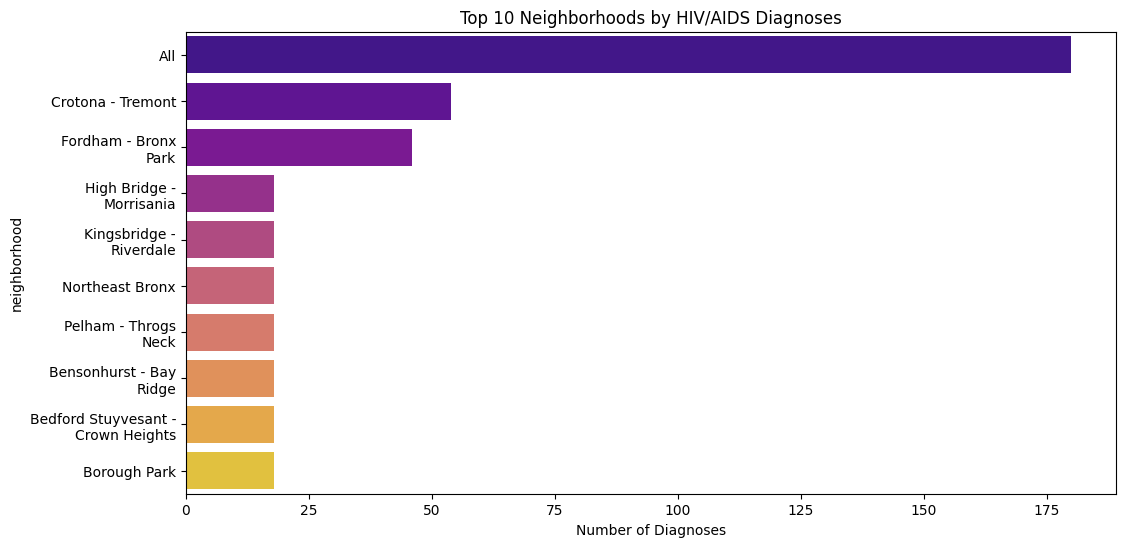

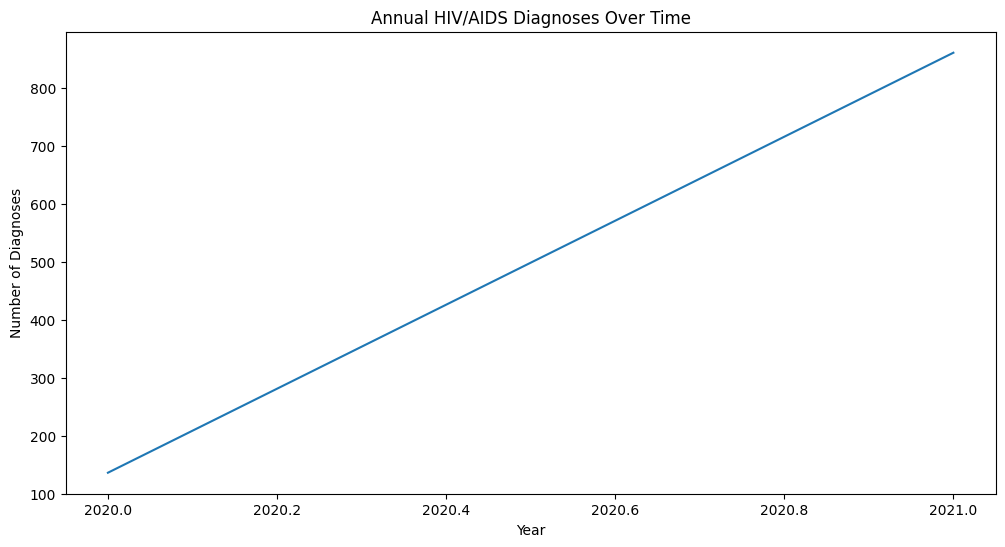

C:\Users\Dell\AppData\Local\Temp\ipykernel_16944\4090414330.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=racial_counts.values, y=racial_counts.index, palette="viridis")


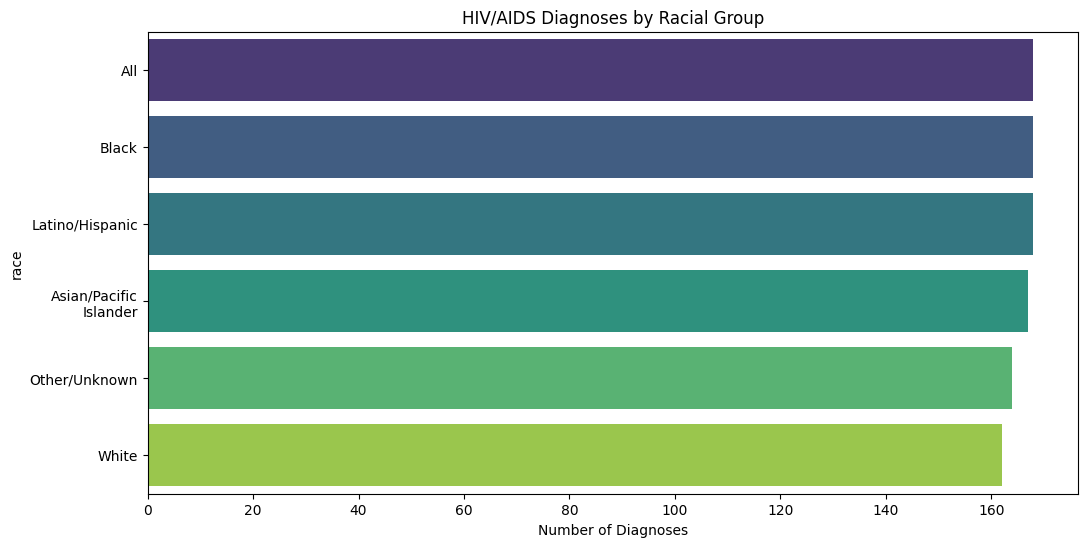

In [30]:
# Visualizing diagnosis counts by neighborhood 
neighborhood_counts = hiv_data['neighborhood'].value_counts().nlargest(10) 
plt.figure(figsize=(12, 6)) 
sns.barplot(x=neighborhood_counts.values, y=neighborhood_counts.index, palette="plasma") 
plt.title("Top 10 Neighborhoods by HIV/AIDS Diagnoses") 
plt.xlabel("Number of Diagnoses") 
plt.show() 

# Diagnoses by year 
hiv_data['year'] = pd.to_datetime(hiv_data['year'], format='%Y') 
annual_diagnoses = hiv_data.groupby(hiv_data['year'].dt.year).size() 
plt.figure(figsize=(12, 6)) 
annual_diagnoses.plot() 
plt.title("Annual HIV/AIDS Diagnoses Over Time") 
plt.ylabel("Number of Diagnoses") 
plt.xlabel("Year") 
plt.show()

#Diagnoses by Racial Group
racial_counts = hiv_data['race'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=racial_counts.values, y=racial_counts.index, palette="viridis")
plt.title("HIV/AIDS Diagnoses by Racial Group")
plt.xlabel("Number of Diagnoses")
plt.show()


Diagnoses by sex:

The pie chart will visually display the distribution of HIV/AIDS diagnoses by sex, with both the exact number of diagnoses and the percentage clearly shown. This provides a clear and comprehensive view of gender-based disparities in HIV/AIDS diagnoses.

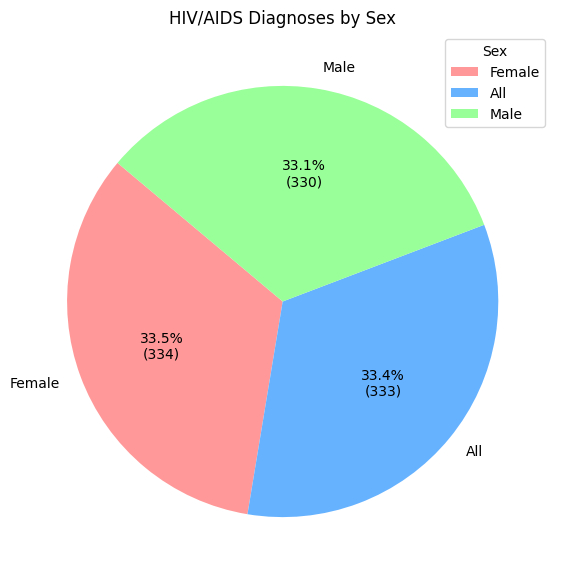

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_url = 'https://data.cityofnewyork.us/resource/ykvb-493p.csv'
hiv_data = pd.read_csv(data_url)

# Handling missing values and data filtering
hiv_data = hiv_data.dropna(subset=['neighborhood', 'race', 'year', 'sex', 'hiv_diagnoses_num'])
hiv_data = hiv_data[hiv_data['race'] != 'Unknown']
hiv_data['year'] = pd.to_datetime(hiv_data['year'], format='%Y')

# Diagnoses by Sex
sex_counts = hiv_data['sex'].value_counts()


#Other
# Pie chart for Diagnoses by Sex
sex_counts = hiv_data['sex'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(sex_counts, labels=sex_counts.index, autopct=lambda p: f'{p:.1f}%\n({int(p*sum(sex_counts)/100)})', startangle=140, colors=['#FF9999', '#66B2FF', '#99FF99'])
plt.title("HIV/AIDS Diagnoses by Sex")
plt.legend(title="Sex", loc="upper right")


In my experience working in the healthcare field, specifically within an HIV program in NYC, I have encountered many transgender patients who do not identify as male or female. This is likely why the 'All' category exists in this dataset. Many of these individuals are Men who have Sex with Men (MSM) and transgender men to female (MTF). Therefore, for this specific plot, I assumed that the 'All' gender category could be reasonably converted to 'Male' for the purpose of following analysis.

sex
Male      663
Female    334
Name: count, dtype: int64


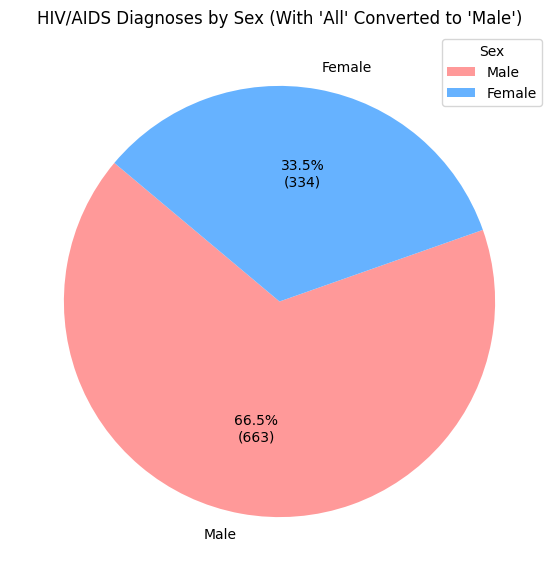

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_url = 'https://data.cityofnewyork.us/resource/ykvb-493p.csv'
hiv_data = pd.read_csv(data_url)

# Handling missing values and data filtering
hiv_data = hiv_data.dropna(subset=['neighborhood', 'race', 'year', 'sex', 'hiv_diagnoses_num'])
hiv_data = hiv_data[hiv_data['race'] != 'Unknown']
hiv_data['year'] = pd.to_datetime(hiv_data['year'], format='%Y')

# Convert 'all' to 'male' in the 'sex' column
hiv_data['sex'] = hiv_data['sex'].replace({'All': 'Male'})

# Verify the changes
print(hiv_data['sex'].value_counts())

# Diagnoses by Sex (with 'all' converted to 'male')
sex_counts = hiv_data['sex'].value_counts()

# Pie chart
plt.figure(figsize=(10, 7))
plt.pie(sex_counts, labels=sex_counts.index, autopct=lambda p: f'{p:.1f}%\n({int(p*sum(sex_counts)/100)})', startangle=140, colors=['#FF9999', '#66B2FF'])
plt.title("HIV/AIDS Diagnoses by Sex (With 'All' Converted to 'Male')")
plt.legend(title="Sex", loc="upper right")
plt.show()


#Conclusions

1. High Variability in Diagnosis Counts:

There is a significant variability in the number of HIV and AIDS diagnoses across different neighborhoods, with some neighborhoods reporting very high counts and others reporting none. This suggests disparities in the distribution of HIV/AIDS cases, which could be influenced by socio-economic factors, access to healthcare, and local public health efforts.

2. Wide Range of Diagnosis Rates:

The rates of diagnoses per 100,000 people also show high variability. Some neighborhoods have extremely high diagnosis rates, indicating potential hotspots for HIV/AIDS transmission that may require targeted interventions.

3. Concurrent Diagnoses:

The number of concurrent HIV/AIDS diagnoses among all diagnoses is relatively low on average but varies widely. This indicates that while concurrent diagnoses are not extremely common, they occur with varying frequency in different neighborhoods.

4. Data Quality and Missing Values:

Although most columns have very few missing values, the concurrent_hiv_aids_among_all column has a significant number of missing entries. This could affect analyses that rely on this variable and may require data imputation or more robust handling techniques.

5. Temporal Distribution:

The data spans from 2020 to 2021, providing a recent snapshot of the HIV/AIDS diagnosis landscape. Continued data collection over more years would help identify longer-term trends.

#Recommendations 

a. Targeted Public Health Interventions:

Public health efforts should focus on neighborhoods with high diagnosis rates to address transmission hotspots and provide resources and education.

b. Improving Data Quality:

Efforts should be made to reduce missing data, particularly for critical variables like concurrent_hiv_aids_among_all.

c. Further Research:

Additional research is needed to understand the underlying factors contributing to the variability in diagnosis rates and counts, such as socio-economic conditions, healthcare access, and public health policies.